<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/ionosphere_data.csv")

In [3]:
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
df_new =  df.drop(['column_b'],axis =1)

In [14]:
df['column_ai'] =  LabelEncoder().fit_transform(df['column_ai'])
df['column_a'] =  LabelEncoder().fit_transform(df['column_a'])

In [15]:
X =  df_new.drop(['column_ai'],axis =1)
y = df_new['column_ai']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [19]:
rf.feature_importances_

array([0.02956885, 0.11588298, 0.03110641, 0.16239141, 0.04474331,
       0.06369631, 0.05467885, 0.01238961, 0.01625761, 0.00801442,
       0.02039691, 0.00908732, 0.02473863, 0.00872098, 0.02136842,
       0.0067684 , 0.02162498, 0.00633088, 0.0142839 , 0.01090992,
       0.02557028, 0.01341582, 0.03085256, 0.01013754, 0.01431735,
       0.09016166, 0.02258691, 0.01624922, 0.00711463, 0.02656145,
       0.01167981, 0.02545322, 0.02293944])

Text(0.5, 0, 'Feature Importance')

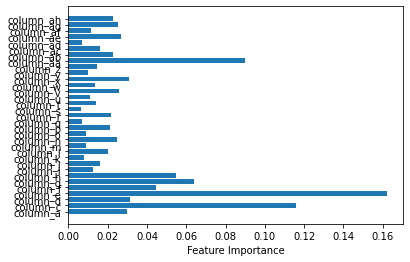

In [20]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

Text(0.5, 0, 'Feature Importance MEAN')

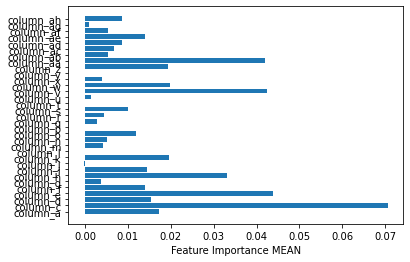

In [21]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

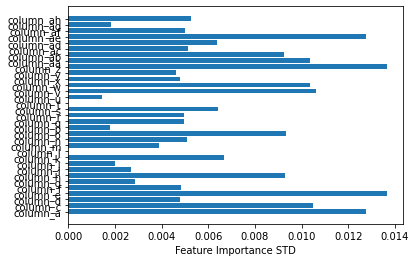

In [22]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

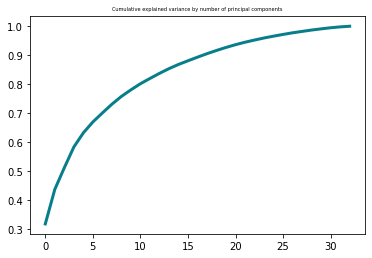

In [23]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [24]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
column_a,-0.031871,0.010467,0.040942,0.102753,0.075802,0.000458,0.109647,0.067161,-0.006515,-0.042839,...,-0.045440,-0.018488,0.040815,-0.025135,-0.047683,0.033018,-0.101880,-0.035856,0.058233,-0.018161
column_c,-0.172870,0.109026,0.209247,0.239333,-0.062069,-0.181431,0.114082,-0.046741,0.017470,-0.117289,...,0.023969,0.006258,-0.011706,-0.008738,0.089126,-0.010108,0.005238,-0.012222,-0.004887,0.023452
column_d,0.127824,0.045115,0.114349,0.044121,-0.284439,0.053329,0.056899,-0.069380,0.017985,0.025248,...,-0.071462,-0.024148,0.035938,-0.026239,-0.027147,-0.069251,0.013316,0.031364,-0.017192,0.018095
column_e,-0.238625,0.103888,0.176207,0.222099,-0.017890,-0.014535,-0.206899,-0.057851,0.138438,-0.125797,...,-0.003344,0.072580,-0.010707,0.011867,-0.055829,0.055916,-0.009867,0.015220,-0.001977,0.057169
column_f,0.125485,-0.019848,0.164383,0.044296,0.290262,-0.011724,-0.003699,-0.066056,0.032485,-0.117584,...,-0.003803,-0.001420,0.034946,-0.060128,0.034082,-0.068601,-0.007730,-0.024273,-0.012959,-0.006186


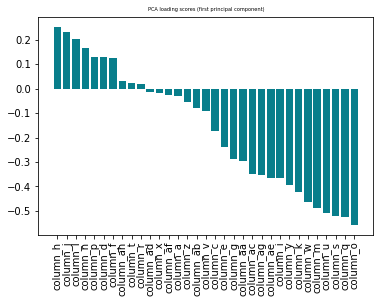

In [25]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([ 1,  3,  0,  5, 29,  7, 31, 27,  6, 10, 19, 21, 13, 12, 14, 11,  2,
        9, 23,  4, 20, 16,  8, 25, 17, 15, 32, 30, 18, 26, 24, 28, 22])

In [27]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['column_b' 'column_d' 'column_a' 'column_f' 'column_ad' 'column_h'
 'column_af' 'column_ab' 'column_g' 'column_k' 'column_t' 'column_v'
 'column_n' 'column_m' 'column_o' 'column_l' 'column_c' 'column_j'
 'column_x' 'column_e' 'column_u' 'column_q' 'column_i' 'column_z'
 'column_r' 'column_p' 'column_ag' 'column_ae' 'column_s' 'column_aa'
 'column_y' 'column_ac' 'column_w']
[1.16646725e+02 1.02892638e+02 8.79253561e+01 6.18245753e+01
 2.98777955e+01 2.47840201e+01 1.81838434e+01 1.63710246e+01
 1.52322565e+01 1.17732797e+01 1.05760121e+01 1.05205678e+01
 9.93918744e+00 8.55174298e+00 7.78360594e+00 7.75621530e+00
 7.55664833e+00 6.85392596e+00 6.65410136e+00 6.59201325e+00
 6.07438980e+00 5.11934019e+00 4.76956666e+00 4.51042964e+00
 3.76731032e+00 1.25743000e+00 1.24707039e+00 6.46737989e-01
 1.12374318e-01 1.04686923e-01 2.65092043e-02 2.16378729e-02
 4.62716304e-03]


Text(0, 0.5, 'Features')

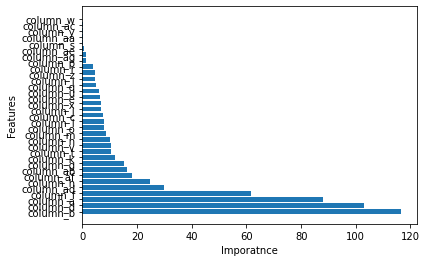

In [28]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [29]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['column_d', 'column_e', 'column_b', 'column_g', 'column_t',
       'column_ad', 'column_ab', 'column_n', 'column_z', 'column_ag',
       'column_f', 'column_m', 'column_af', 'column_w', 'column_o',
       'column_aa', 'column_u', 'column_i', 'column_y', 'column_ae',
       'column_q', 'column_l', 'column_p', 'column_c', 'column_v',
       'column_k', 'column_j', 'column_s', 'column_x', 'column_r',
       'column_h', 'column_ac', 'column_a'], dtype=object)

In [30]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.30706702, 0.2928909 , 0.28907135, 0.28866949, 0.2871185 ,
       0.26832927, 0.25909278, 0.24638559, 0.24569375, 0.2419483 ,
       0.24063727, 0.23833937, 0.23772008, 0.23683424, 0.22628842,
       0.21825982, 0.20336648, 0.20172132, 0.19680711, 0.19529507,
       0.19444243, 0.1915093 , 0.19105037, 0.19095315, 0.18672284,
       0.18463762, 0.18018492, 0.17426855, 0.17234479, 0.1674532 ,
       0.16578443, 0.13853958, 0.13405606])

Text(0, 0.5, 'Features')

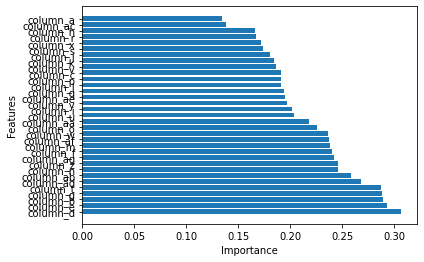

In [31]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [50]:
df_corr = df.drop(['column_b'],axis =1).corr()

In [51]:
print(abs(df_corr['column_ai']))

column_a     0.465614
column_c     0.519145
column_d     0.125884
column_e     0.516477
column_f     0.149099
column_g     0.450429
column_h     0.207544
column_i     0.294852
column_j     0.120634
column_k     0.167908
column_l     0.159940
column_m     0.181682
column_n     0.197041
column_o     0.207201
column_p     0.148775
column_q     0.087060
column_r     0.119346
column_s     0.117435
column_t     0.035620
column_u     0.219583
column_v     0.116385
column_w     0.204361
column_x     0.006193
column_y     0.188185
column_z     0.001541
column_aa    0.111107
column_ab    0.042756
column_ac    0.250036
column_ad    0.003942
column_ae    0.294417
column_af    0.036004
column_ag    0.261157
column_ah    0.064168
column_ai    1.000000
Name: column_ai, dtype: float64
